In [1]:
from fastai.vision.all import *
import timm

In [2]:
file_path = '...\\Training\\'

In [3]:
def get_dls():
    dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                      get_items=get_image_files,
                      item_tfms=Resize(64), 
                      get_y=parent_label, 
                      splitter=RandomSplitter(seed=0))
    return dblock.dataloaders(file_path, bs=8, num_workers=0)

In [4]:
dls = get_dls()

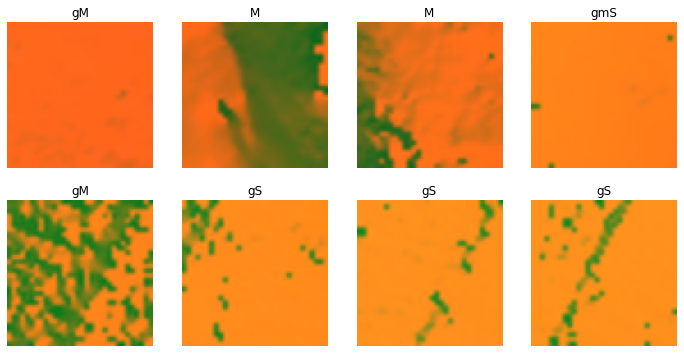

In [5]:
dls.show_batch()

In [6]:
dls.vocab

['(g)M', '(g)S', '(g)mS', 'M', 'S', 'gM', 'gS', 'gmS', 'mS']

In [7]:
def learn(dls, model, epochs=5, fileName=None):
    learn = vision_learner(dls, model, metrics=[error_rate, accuracy,], pretrained=True)
    lr = learn.lr_find()
    learn.fine_tune(epochs, base_lr=lr.valley)
    if fileName != None:
        learn.export(f'...\\{fileName}.pkl')
        print(f'{fileName} saving complete......................................')
    return learn

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\anokye/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.990503,1.880873,0.442675,0.557325,00:20


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.395058,0.641905,0.194268,0.805732,00:41
1,1.107863,0.407546,0.114650,0.885350,00:45
2,0.886677,0.305378,0.111465,0.888535,00:49
3,0.493327,0.146221,0.038217,0.961783,00:50
4,0.343088,0.141574,0.054140,0.945860,00:49


squeeze saving complete......................................


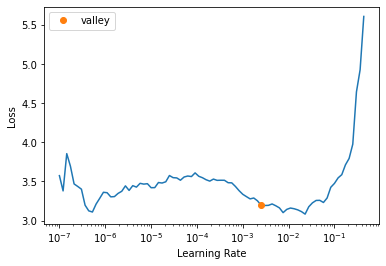

In [8]:
#model = resnet18
#model = densenet121
#model = 'mobilenetv2_100'
#model = 'efficientnet_b0'
#model = vgg16_bn
model = squeezenet1_1

learn = learn(dls=dls, epochs=5, model=model,fileName='squeeze')

In [9]:
interop = ClassificationInterpretation.from_learner(learn)

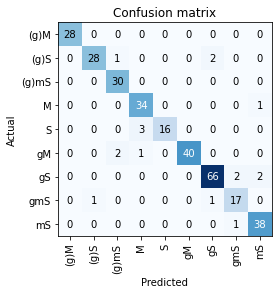

In [10]:
interop.plot_confusion_matrix()

In [11]:
interop.print_classification_report()

              precision    recall  f1-score   support

        (g)M       1.00      1.00      1.00        28
        (g)S       0.97      0.90      0.93        31
       (g)mS       0.91      1.00      0.95        30
           M       0.89      0.97      0.93        35
           S       1.00      0.84      0.91        19
          gM       1.00      0.93      0.96        43
          gS       0.96      0.94      0.95        70
         gmS       0.85      0.89      0.87        19
          mS       0.93      0.97      0.95        39

    accuracy                           0.95       314
   macro avg       0.94      0.94      0.94       314
weighted avg       0.95      0.95      0.95       314

